<a href="https://colab.research.google.com/github/Vicente-Figueroa/IBM-MachineLearning/blob/main/fashion_mnist_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the dataset MNIST
from keras.datasets import mnist, cifar10, fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats, 3072

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 10s 32ms/step - loss: 0.4140 - val_loss: 0.3420
Epoch 2/50
235/235 [==============================] - 5s 23ms/step - loss: 0.3272 - val_loss: 0.3201
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3120 - val_loss: 0.3086
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3023 - val_loss: 0.3012
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2959 - val_loss: 0.2955
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2918 - val_loss: 0.2923
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2891 - val_loss: 0.2904
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2873 - val_loss: 0.2888
Epoch 9/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2862 - val_loss: 0.2879
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2854 - val_l

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

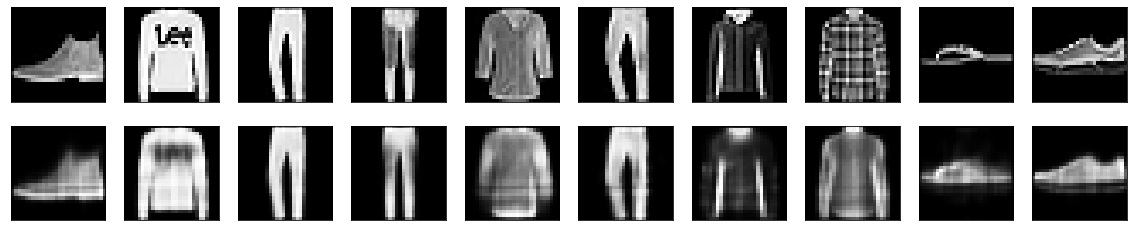

In [9]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()